In [12]:
'''_In this script, we ..._'''



'_In this script, we ..._'

In [13]:
# -*- coding: utf-8 -*- #
# Authors: gracecaj@stud.ntnu.no, sbaarak@stud.ntnu.no, & annakale@stud.ntnu.no
# Date: 19/09/2023

In [14]:
#%%
#* Import the code needed
import os
import pandas as pd
from pathlib import Path
import numpy as np
import copy
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from scipy.optimize import curve_fit

In [15]:
#%%
#* Define paths
directory_path = Path('../../')

In [16]:
# getting the name of the directory where the this file is present.
current = os.path.dirname(os.path.realpath('this'))
 
# Getting the parent directory name where the current directory is present.
parent = os.path.dirname(current)
#make the UA path
module_path = parent + '/modules'
#append path to options to import from
sys.path.append(module_path)

import natural_cubic_spline_stack_overflow as ncs
import logistic_curve_function as logistic
  


# Import the cleaned and concatenated datasets

In [17]:
historical_PpD = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'PpD' / 'historical_PpD.xlsx',
    index_col=0)

In [18]:
historical_Pop = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Population' / 'Norway_population_clean.xlsx',
    index_col=0)

In [19]:
historical_UFApD_SFH = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'UFApD' / 'historical_UFApD_SFH.xlsx',
    index_col=0)

historical_UFApD_TH = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'UFApD' / 'historical_UFApD_TH.xlsx',
    index_col=0)

historical_UFApD_AB = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'UFApD' / 'historical_UFApD_AB.xlsx',
    index_col=0)

In [20]:
Dwelling_Lifetime = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Dwelling_Lifetime' / 'Cleaned_Dwelling_Lifetime.xlsx',
    index_col=0)

# Test Regression types on the historical data, pick the best

Regression of Lifetime Std Dev

In [21]:
Dwelling_Lifetime

,Average lifetime,std_dev
Year,,
1800,150,45.0
1801,150,45.0
1802,150,45.0
1803,150,45.0
1804,150,45.0
...,...,...
2096,95,19.0
2097,95,19.0
2098,95,19.0


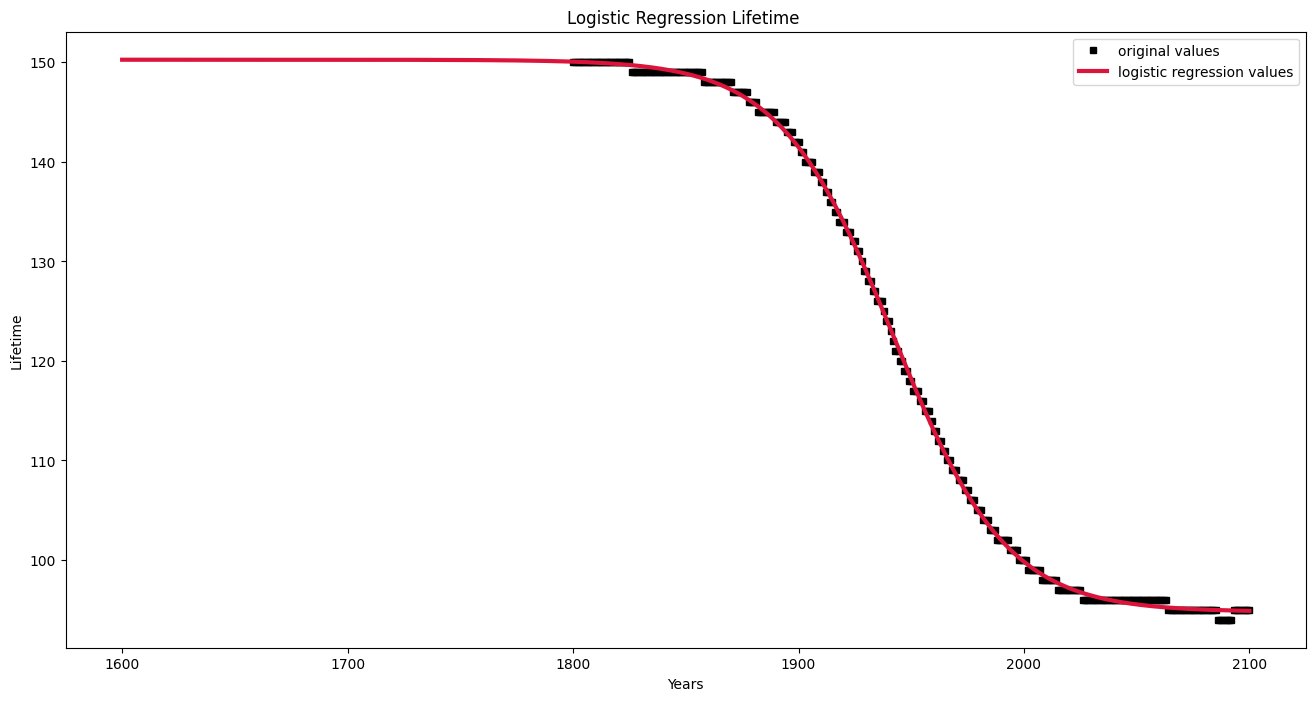

In [115]:
#* Logistic Regression of Lifetime

oj_years_avg_life = Dwelling_Lifetime.index
oj_values_avg_life = Dwelling_Lifetime['Average lifetime']

inputs = oj_years_avg_life
outputs = oj_values_avg_life

early_years = np.array(np.arange(1600, 1801, 1, dtype=int))
pred_inputs_l_avg_life = np.append(early_years, oj_years_avg_life)
pred_inputs_l_avg_life.sort()

popt, pcov = curve_fit(logistic.logistic, inputs, outputs, bounds = ([min(inputs), 0, 0, 0], [max(inputs), 10**6, 10**5, 10**6]))
pred_outputs_l_avg_life = logistic.logistic(pred_inputs_l_avg_life, *popt)

fig=plt.figure(figsize = (16,8))
plt.plot(oj_years_avg_life, oj_values_avg_life, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_l_avg_life, pred_outputs_l_avg_life, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')
plt.xlabel('Years')
plt.ylabel('Lifetime')
plt.title('Logistic Regression Lifetime ')
plt.show()

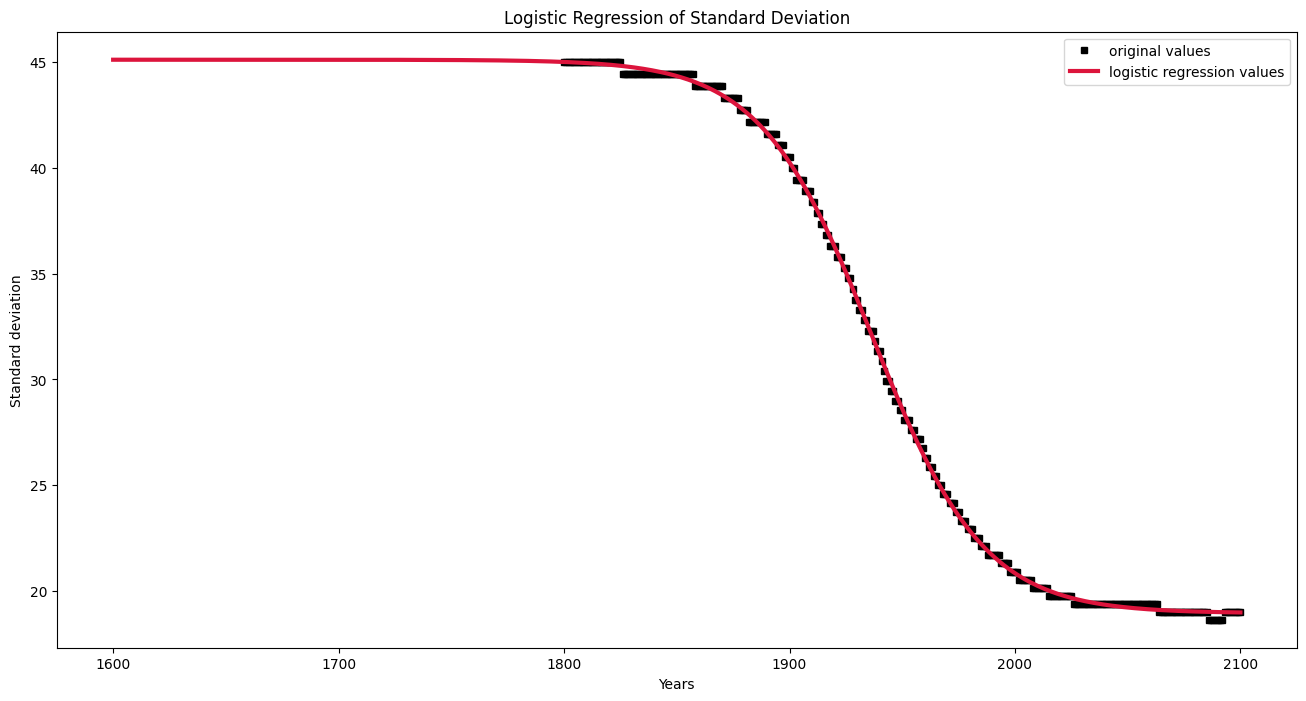

In [85]:
#* Logistic Regression of Standard deviation

oj_years_std_dev = Dwelling_Lifetime.index
oj_values_std_dev = Dwelling_Lifetime['std_dev']

inputs = oj_years_std_dev
outputs = oj_values_std_dev

early_years = np.array(np.arange(1600, 1801, 1, dtype=int))
pred_inputs_l_std_dev = np.append(early_years, oj_years_std_dev)
pred_inputs_l_std_dev.sort()

popt, pcov = curve_fit(logistic.logistic, inputs, outputs, bounds = ([min(inputs), 0, 0, 0], [max(inputs), 10**6, 10**5, 10**6]))
pred_outputs_l_std_dev = logistic.logistic(pred_inputs_l_std_dev, *popt)

fig=plt.figure(figsize = (16,8))
plt.plot(oj_years_std_dev, oj_values_std_dev, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_l_std_dev, pred_outputs_l_std_dev, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')
plt.xlabel('Years')
plt.ylabel('Standard deviation')
plt.title('Logistic Regression of Standard Deviation')
plt.show()

In [24]:
regression_std_dev = pd.DataFrame(pred_outputs_l_std_dev, index=np.arange(1600,2102))
regression_std_dev = regression_std_dev.rename(columns={0:'std_dev'})
regression_std_dev

,std_dev
1600,45.124627
1601,45.124626
1602,45.124624
1603,45.124623
1604,45.124621
...,...
2097,18.978969
2098,18.977290
2099,18.975677
2100,18.974128


In [25]:
regression_lifetime = pd.DataFrame(pred_outputs_l_avg_life, index=np.arange(1600,2102))
regression_lifetime= regression_lifetime.rename(columns={0:'Avg_lifetime'})
regression_lifetime

,Avg_lifetime
1600,150.260987
1601,150.260984
1602,150.260981
1603,150.260978
1604,150.260975
...,...
2097,94.909600
2098,94.904864
2099,94.900312
2100,94.895936


In [26]:
regression_lifetime = pd.concat([regression_lifetime, regression_std_dev], axis=1)
regression_lifetime = regression_lifetime.drop(index=[2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101])
regression_lifetime

,Avg_lifetime,std_dev
1600,150.260987,45.124627
1601,150.260984,45.124626
1602,150.260981,45.124624
1603,150.260978,45.124623
1604,150.260975,45.124621
...,...,...
2046,95.699156,19.265274
2047,95.664208,19.252439
2048,95.630580,19.240100
2049,95.598222,19.228236


Regresion of Lifetime Avg

# Regression of Pop

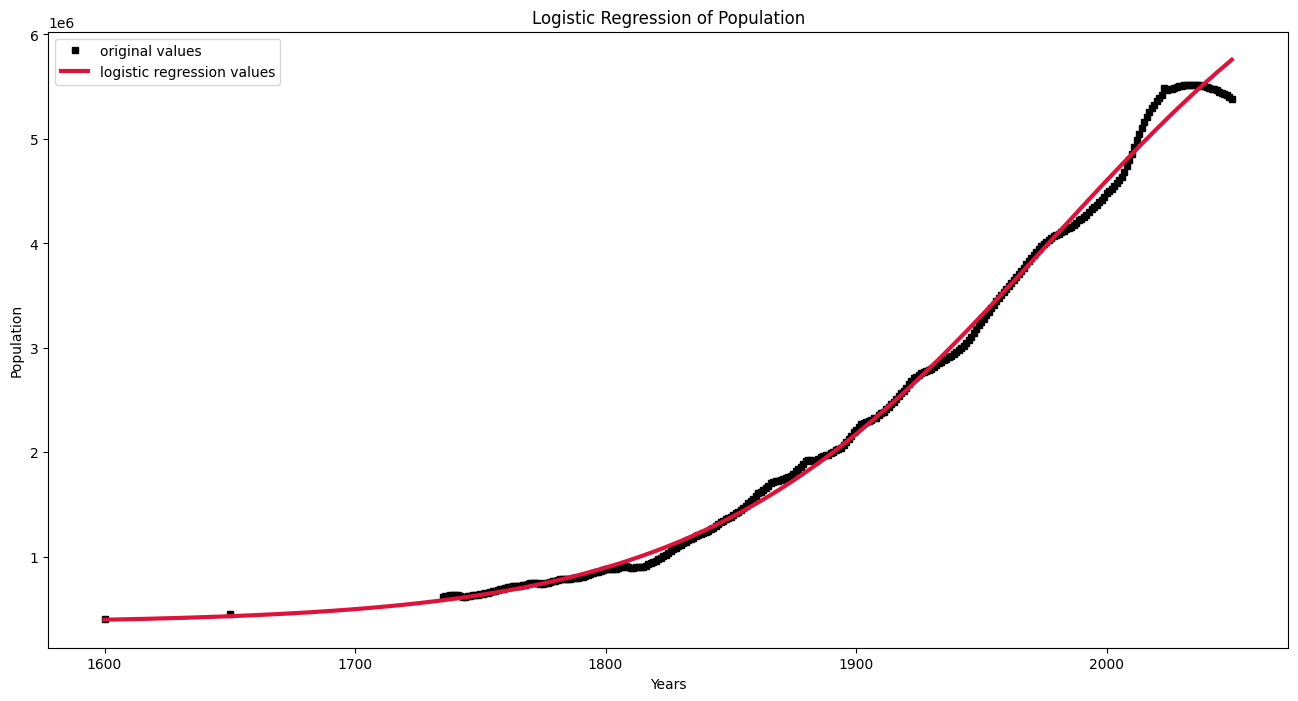

In [86]:
#* Logistic Regression of Population

oj_years_Pop = historical_Pop.index
oj_values_Pop = historical_Pop['Population']

inputs = oj_years_Pop
outputs = oj_values_Pop

#early_years = np.array(np.arange(1600, 1801, 1, dtype=int))
#pred_inputs_l_Pop = np.append(early_years, oj_years_Pop)

#pred_inputs_l_Pop.sort()
pred_inputs_l_Pop = oj_years_Pop


popt, pcov = curve_fit(logistic.logistic, inputs, outputs, bounds = ([min(inputs), 0, 0, 0], [max(inputs), 10**7, 10**6, 10**7]))
pred_outputs_l_Pop = logistic.logistic(pred_inputs_l_Pop, *popt)

fig=plt.figure(figsize = (16,8))
plt.plot(oj_years_Pop, oj_values_Pop, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_l_Pop, pred_outputs_l_Pop, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Logistic Regression of Population')
plt.show()

In [28]:
regression_Pop = pd.DataFrame(data=[pred_inputs_l_Pop, pred_outputs_l_Pop]).T

regression_Pop.rename(columns={0: 'Year', 1: 'Pop'}, inplace=True)
regression_Pop.set_index('Year', inplace=True)
regression_Pop = regression_Pop.drop_duplicates()
regression_Pop

,Pop
Year,
1600.0,3.978326e+05
1601.0,3.982964e+05
1602.0,3.987669e+05
1603.0,3.992442e+05
1604.0,3.997283e+05
...,...
2046.0,5.676510e+06
2047.0,5.697130e+06
2048.0,5.717614e+06


# Regression of PpD

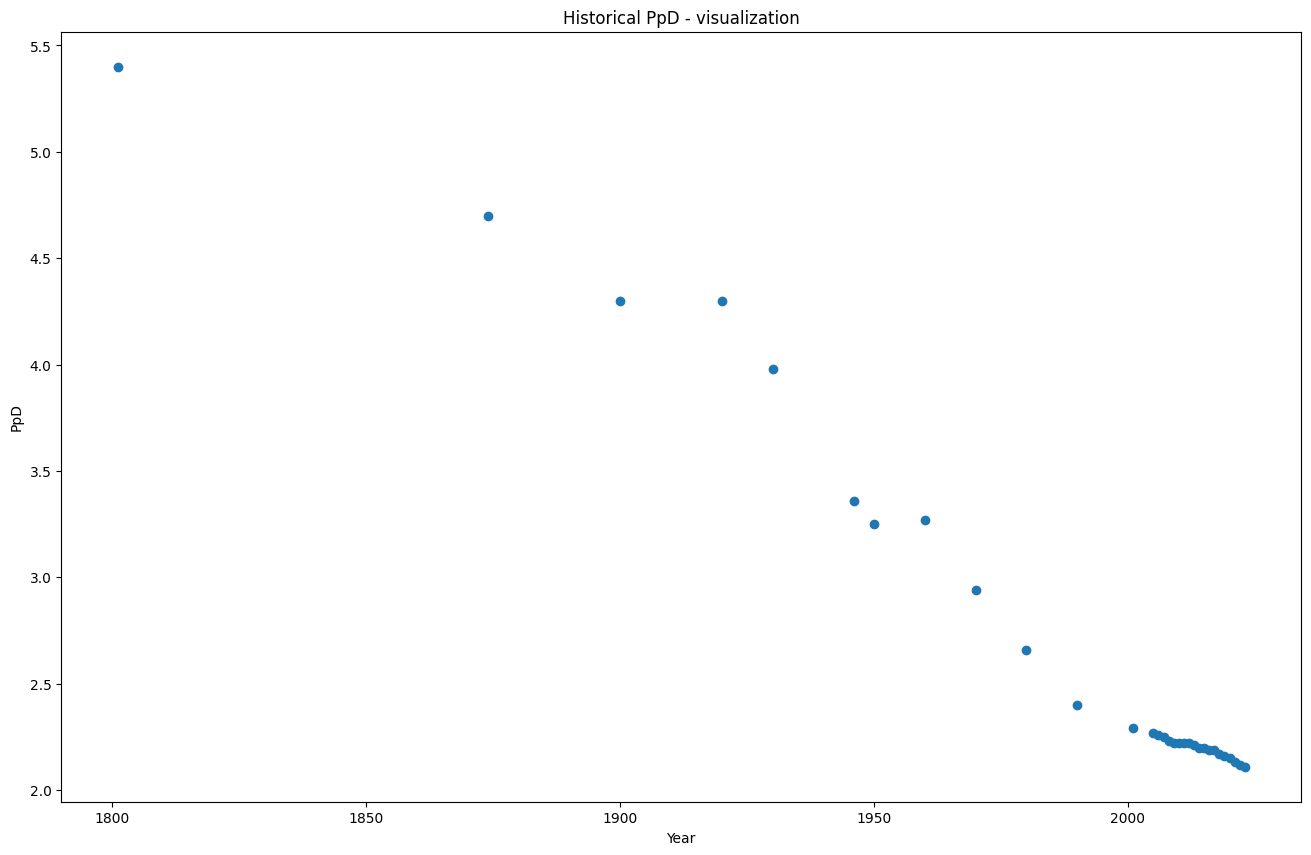

In [29]:
plt.figure(figsize=(16,10))
plt.scatter(historical_PpD.index, historical_PpD['PpD'])
plt.xlabel('Year')
plt.ylabel('PpD')
plt.title('Historical PpD - visualization')
plt.show()

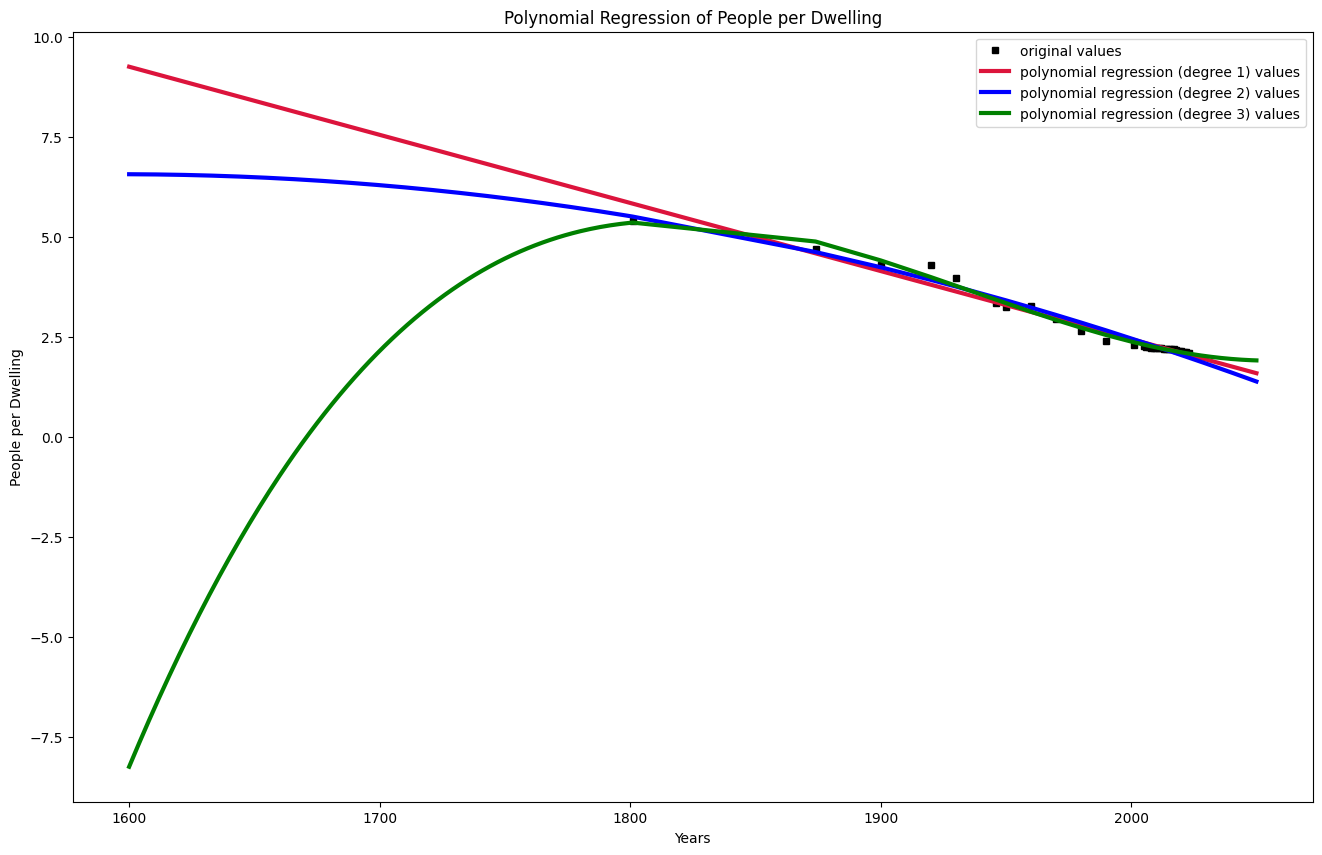

In [88]:
#* Linear Regression of PpD

#the basic values:
oj_years_PpD = historical_PpD.index
oj_values_PpD = historical_PpD['PpD']
#________________________________________________
#create the short data set for the regression

limit_pred = int(len(oj_years_PpD)*1.5) #limit the prediction to 1.5* perc % of the data
reg_predictor_years = oj_years_PpD[0:limit_pred]

#perform regression:
#find beta
linear_model1 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, 1))
linear_model2 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, 2))
linear_model3 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, 3))

#apply to extended values
lin_reg_fitted_values1 = linear_model1(reg_predictor_years)
lin_reg_fitted_values2 = linear_model2(reg_predictor_years)
lin_reg_fitted_values3 = linear_model3(reg_predictor_years)
#________________________________________
inputs = oj_years_PpD
outputs = oj_values_PpD

early_years = np.array(np.arange(1600, 1800, 1, dtype=int))
prelim_append = np.append(early_years, oj_years_PpD)
pred_inputs_lin_PpD = np.append(prelim_append, np.arange(2024, 2051, 1, dtype=int))

#perform regression:
#set degreee:
degree1 = 1
degree2 = 2
degree3 = 3
#find polynomial
polynomial1 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, degree1))
polynomial2 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, degree2))
polynomial3 = np.poly1d(np.polyfit(oj_years_PpD, oj_values_PpD, degree3))

#apply to extended values
pred_outputs_lin1_PpD = polynomial1(pred_inputs_lin_PpD)
pred_outputs_lin2_PpD = polynomial2(pred_inputs_lin_PpD)
pred_outputs_lin3_PpD = polynomial3(pred_inputs_lin_PpD)
#_________________________________________________________________
plt.figure(figsize=(16,10))
plt.plot(oj_years_PpD, oj_values_PpD, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_lin_PpD, pred_outputs_lin1_PpD, color = 'crimson', lw = 3, label = f'polynomial regression (degree {degree1}) values')
plt.plot(pred_inputs_lin_PpD, pred_outputs_lin2_PpD, color = 'blue', lw = 3, label = f'polynomial regression (degree {degree2}) values')
plt.plot(pred_inputs_lin_PpD, pred_outputs_lin3_PpD, color = 'green', lw = 3, label = f'polynomial regression (degree {degree3}) values')
plt.legend(loc = 'best')
plt.title('Polynomial Regression of People per Dwelling')
plt.xlabel('Years')
plt.ylabel('People per Dwelling')
plt.show()

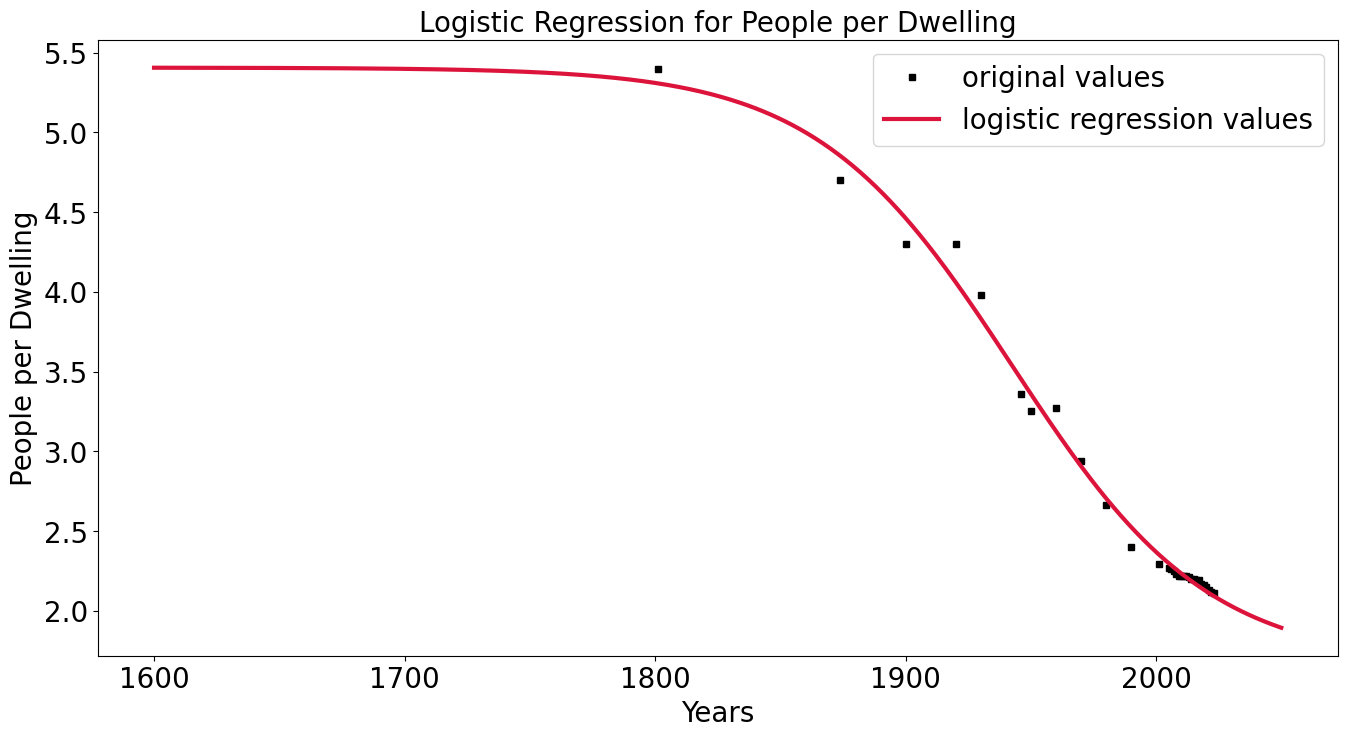

In [89]:
#* Logistic Regression of PpD

oj_years_PpD = historical_PpD.index
oj_values_PpD = historical_PpD['PpD']
#___________________________
inputs = oj_years_PpD
outputs = oj_values_PpD

early_years = np.array(np.arange(1600, 1801, 1, dtype=int))
prelim_append_1 = np.append(early_years, oj_years_PpD)

missing_years_1 = np.array(np.arange(1802, 1874, 1, dtype=int))
prelim_append_2 = np.append(prelim_append_1, missing_years_1)

missing_years_2 = np.array(np.arange(1901, 1920, 1, dtype=int))
prelim_append_3 = np.append(prelim_append_2, missing_years_2)

missing_years_3 = np.array(np.arange(1921, 1930, 1, dtype=int))
prelim_append_4 = np.append(prelim_append_3, missing_years_3)

missing_years_4 = np.array(np.arange(1931, 1946, 1, dtype=int))
prelim_append_5 = np.append(prelim_append_4, missing_years_4)

missing_years_5 = np.array(np.arange(1947, 1950, 1, dtype=int))
prelim_append_6 = np.append(prelim_append_5, missing_years_5)

missing_years_6 = np.array(np.arange(1951, 1960, 1, dtype=int))
prelim_append_7 = np.append(prelim_append_6, missing_years_6)

missing_years_7 = np.array(np.arange(1961, 1970, 1, dtype=int))
prelim_append_8 = np.append(prelim_append_7, missing_years_7)

missing_years_8 = np.array(np.arange(1971, 1980, 1, dtype=int))
prelim_append_9 = np.append(prelim_append_8, missing_years_8)

missing_years_9 = np.array(np.arange(1981, 1990, 1, dtype=int))
prelim_append_10 = np.append(prelim_append_9, missing_years_9)

missing_years_10 = np.array(np.arange(1991, 2001, 1, dtype=int))
prelim_append_11 = np.append(prelim_append_10, missing_years_10)

missing_years_11 = np.array(np.arange(2002, 2005, 1, dtype=int))
prelim_append_12 = np.append(prelim_append_11, missing_years_11)

missing_years_12 = np.array(np.arange(1875, 1900, 1, dtype=int))
prelim_append_13 = np.append(prelim_append_12, missing_years_12)

pred_inputs_l_PpD = np.append(prelim_append_13, np.arange(2024, 2051, 1, dtype=int))
pred_inputs_l_PpD.sort()

popt, pcov = curve_fit(logistic.logistic, inputs, outputs, bounds = ([min(inputs), 0, 0, 0], [max(inputs), 10**6, 10**5, 10**6]))
pred_outputs_l_PpD = logistic.logistic(pred_inputs_l_PpD, *popt)

fig=plt.figure(figsize = (16,8))
plt.plot(oj_years_PpD, oj_values_PpD, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_l_PpD, pred_outputs_l_PpD, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc='best', fontsize=20)

# Set font size for the numbers on the plot
plt.xticks(fontsize=20)  # Change the font size for x-axis numbers
plt.yticks(fontsize=20)  # Change the font size for y-axis numbers
plt.xlabel('Years', fontsize=20)
plt.ylabel('People per Dwelling', fontsize=20)
plt.title('Logistic Regression for People per Dwelling', fontsize=20)
plt.show()

The ncs_model


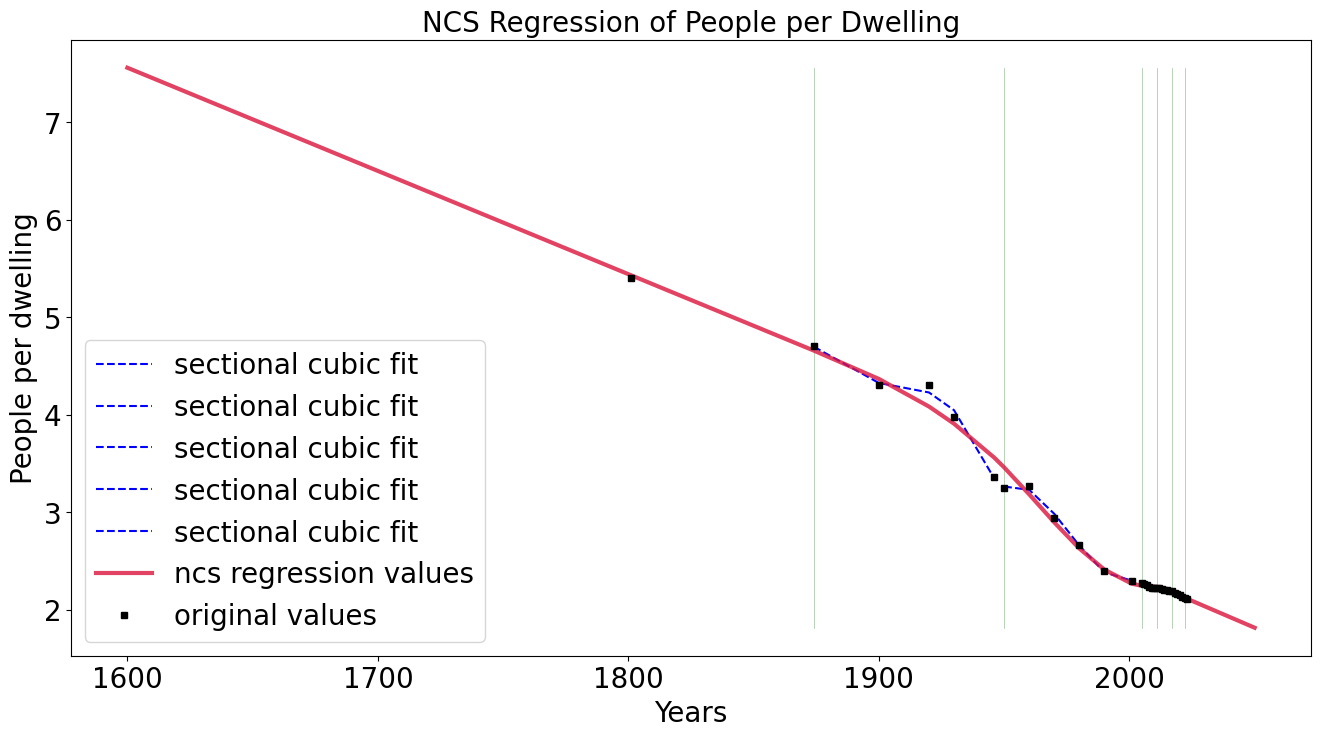

In [90]:
#* NCS Regression of PpD

oj_years_PpD = np.array(historical_PpD.index)
oj_values_PpD = historical_PpD['PpD']

inputs_ncs = oj_years_PpD
outputs_ncs = oj_values_PpD

early_years = np.array(np.arange(1600, 1800, 1, dtype=int))
prelim_append = np.append(early_years, oj_years_PpD)
pred_inputs_ncs_PpD = np.append(prelim_append, np.arange(2024, 2051, 1, dtype=int))

# we can either choose the knots manually, or supply a number of knots
# - see second graphic on top.
# knots at the 2nd and 2nd to last points, and at 20%, 40%, 60% and 80%
knots = [inputs_ncs[1], inputs_ncs[int(0.2*len(inputs_ncs))],inputs_ncs[int(0.4*len(inputs_ncs))],
        inputs_ncs[int(0.6*len(inputs_ncs))], inputs_ncs[int(0.8*len(inputs_ncs))], inputs_ncs[-2]]

# just for showing the different cubic fits
sections = []
for i, knot in enumerate(knots[1:]):
    index_first = np.where(inputs_ncs == knots[i])[0][0]
    index_second = np.where(inputs_ncs == knot)[0][0]
    section_years = inputs_ncs[index_first:index_second]
    section_values = outputs_ncs[index_first:index_second]
    sections.append([section_years, section_values])

# setting up the actual model (training)
ncs_model = ncs.get_natural_cubic_spline_model(inputs_ncs, outputs_ncs, minval=min(inputs_ncs), 
                                               maxval=max(inputs_ncs), knots = knots)
# predicting of the single curve by the model
pred_outputs_ncs_PpD = ncs_model.predict(pred_inputs_ncs_PpD)
print(f'The ncs_model')

fig=plt.figure(figsize = (16,8))
#plot the knots:
for knot in knots:
    plt.plot([knot, knot], [min(pred_outputs_ncs_PpD), max(pred_outputs_ncs_PpD)], lw = 0.5, color = 'darkgreen', 
             alpha = 0.4)

for section in sections:
    [x,y] = section
    polynomial = np.poly1d(np.polyfit(x, y, 3))
    pol_outputs = polynomial(x)
    plt.plot(x, pol_outputs, '--', color = 'blue', lw = 1.5, label = 'sectional cubic fit')

# Set font size for the numbers on the plot
plt.xticks(fontsize=20)  # Change the font size for x-axis numbers
plt.yticks(fontsize=20)  # Change the font size for y-axis numbers

plt.plot(pred_inputs_ncs_PpD, pred_outputs_ncs_PpD, color = 'crimson', lw = 3, alpha = 0.8,
         label = 'ncs regression values')
plt.plot(oj_years_PpD, oj_values_PpD, 's', color = 'black', markersize = 5, 
         label = f'original values')
plt.legend(loc='best', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.ylabel('People per dwelling', fontsize=20)
plt.title('NCS Regression of People per Dwelling', fontsize=20)
plt.show()


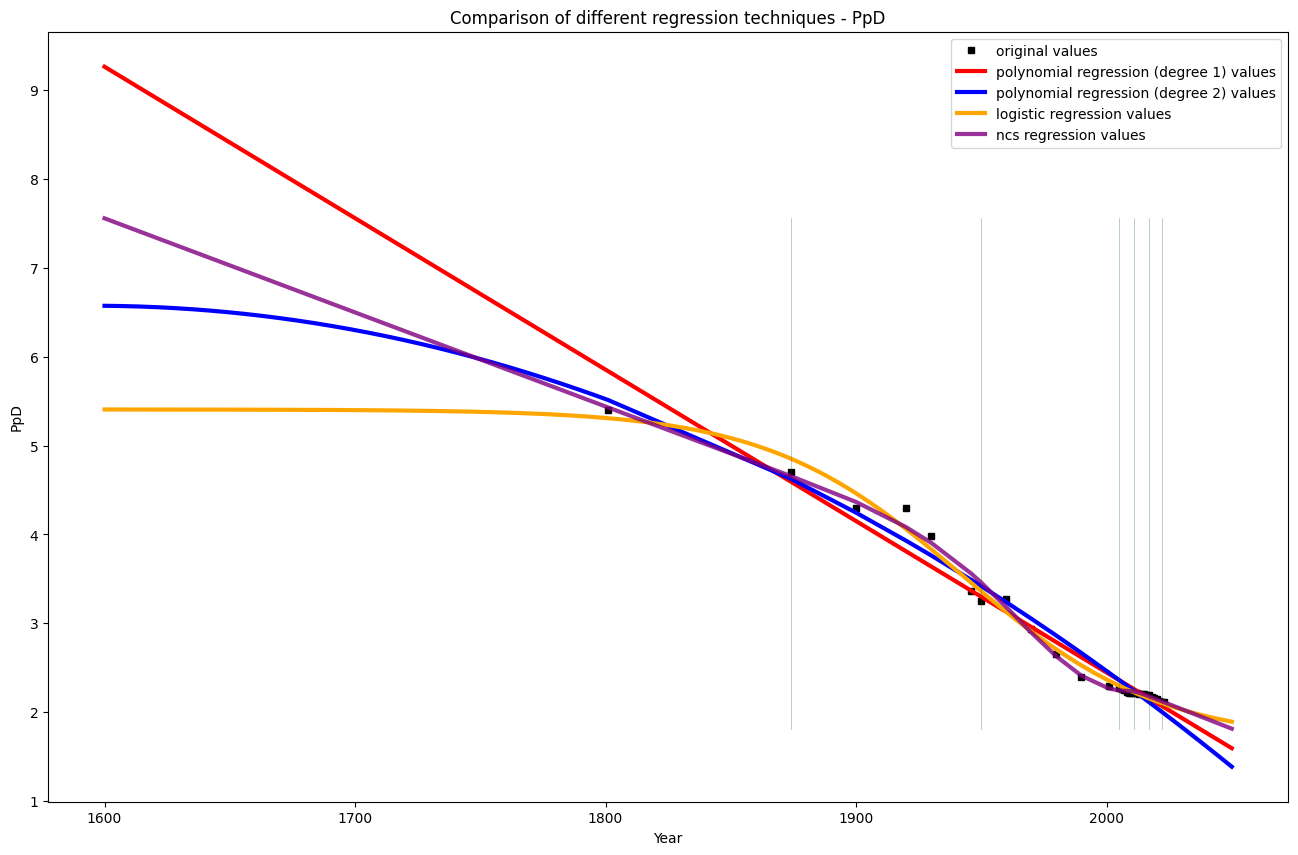

In [91]:
#All regression of PpD

plt.figure(figsize=(16,10))

#Raw data
plt.plot(oj_years_PpD, oj_values_PpD, 's', color = 'black', markersize = 5, 
         label = f'original values')

# Polynomial
plt.plot(pred_inputs_lin_PpD, pred_outputs_lin1_PpD, color = 'red', lw = 3, label = f'polynomial regression (degree {degree1}) values')
plt.plot(pred_inputs_lin_PpD, pred_outputs_lin2_PpD, color = 'blue', lw = 3, label = f'polynomial regression (degree {degree2}) values')
#plt.plot(pred_inputs_lin_PpD, pred_outputs_lin3_PpD, color = 'green', lw = 3, label = f'polynomial regression (degree {degree3}) values')

#Log
plt.plot(pred_inputs_l_PpD, pred_outputs_l_PpD, color = 'orange', lw = 3, label = 'logistic regression values')

#NCS
for knot in knots:
    plt.plot([knot, knot], [min(pred_outputs_ncs_PpD), max(pred_outputs_ncs_PpD)], lw = 0.5, color = 'darkgreen', 
             alpha = 0.4)

#for section in sections:
 #   [x,y] = section
  #  polynomial = np.poly1d(np.polyfit(x, y, 3))
   # pol_outputs = polynomial(x)
    #plt.plot(x, pol_outputs, '--', color = 'gray', lw = 1.5, label = 'sectional cubic fit')

plt.plot(pred_inputs_ncs_PpD, pred_outputs_ncs_PpD, color = 'purple', lw = 3, alpha = 0.8,
         label = 'ncs regression values')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('PpD')
plt.title('Comparison of different regression techniques - PpD')
plt.show()

https://history.stackexchange.com/questions/23733/what-was-the-average-size-of-french-families-during-the-middle-ages 

This article makes me think that the logistic curve fits best

In [74]:
#print(pred_inputs_l_PpD)
#print(pred_outputs_l_PpD)

regression_PpD = pd.DataFrame(data=[pred_inputs_l_PpD, pred_outputs_l_PpD]).T

regression_PpD.rename(columns={0: 'Year', 1: 'PpD'}, inplace=True)
regression_PpD.set_index('Year', inplace=True)

print(regression_PpD)

             PpD
Year            
1600.0  5.406318
1601.0  5.406302
1602.0  5.406287
1603.0  5.406270
1604.0  5.406254
...          ...
2046.0  1.915802
2047.0  1.909925
2048.0  1.904177
2049.0  1.898556
2050.0  1.893059

[451 rows x 1 columns]


# Regression on UFApD

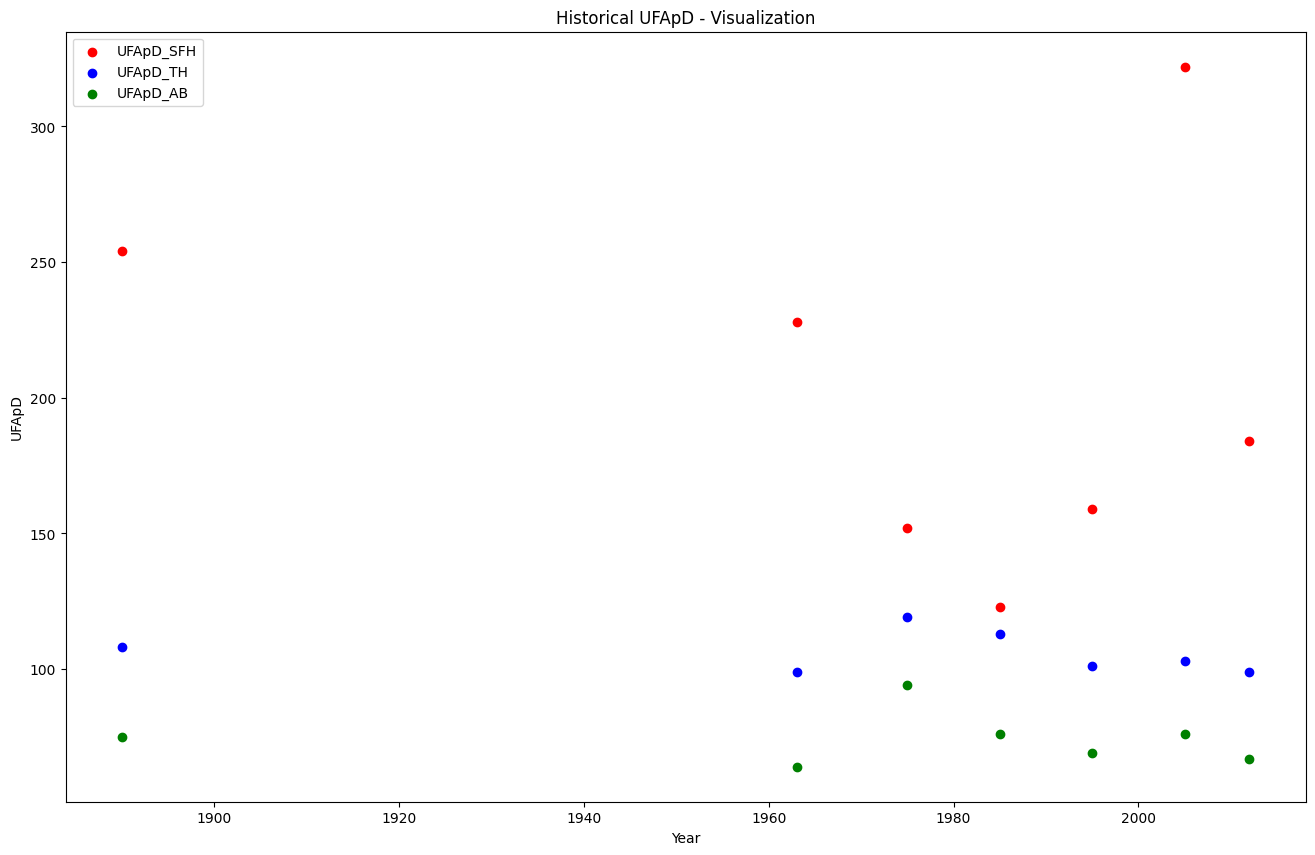

In [103]:
#historical_UFApD_SFH
#historical_UFApD_TH
#historical_UFApD_AB

plt.figure(figsize=(16,10))
plt.scatter(historical_UFApD_SFH.index, historical_UFApD_SFH['UFApD'], c='red', label = 'UFApD_SFH')
plt.scatter(historical_UFApD_TH.index, historical_UFApD_TH['UFApD'], c='blue', label = 'UFApD_TH')
plt.scatter(historical_UFApD_AB.index, historical_UFApD_AB['UFApD'], c='green', label = 'UFApD_AB')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('UFApD')
plt.title('Historical UFApD - Visualization')
plt.show()

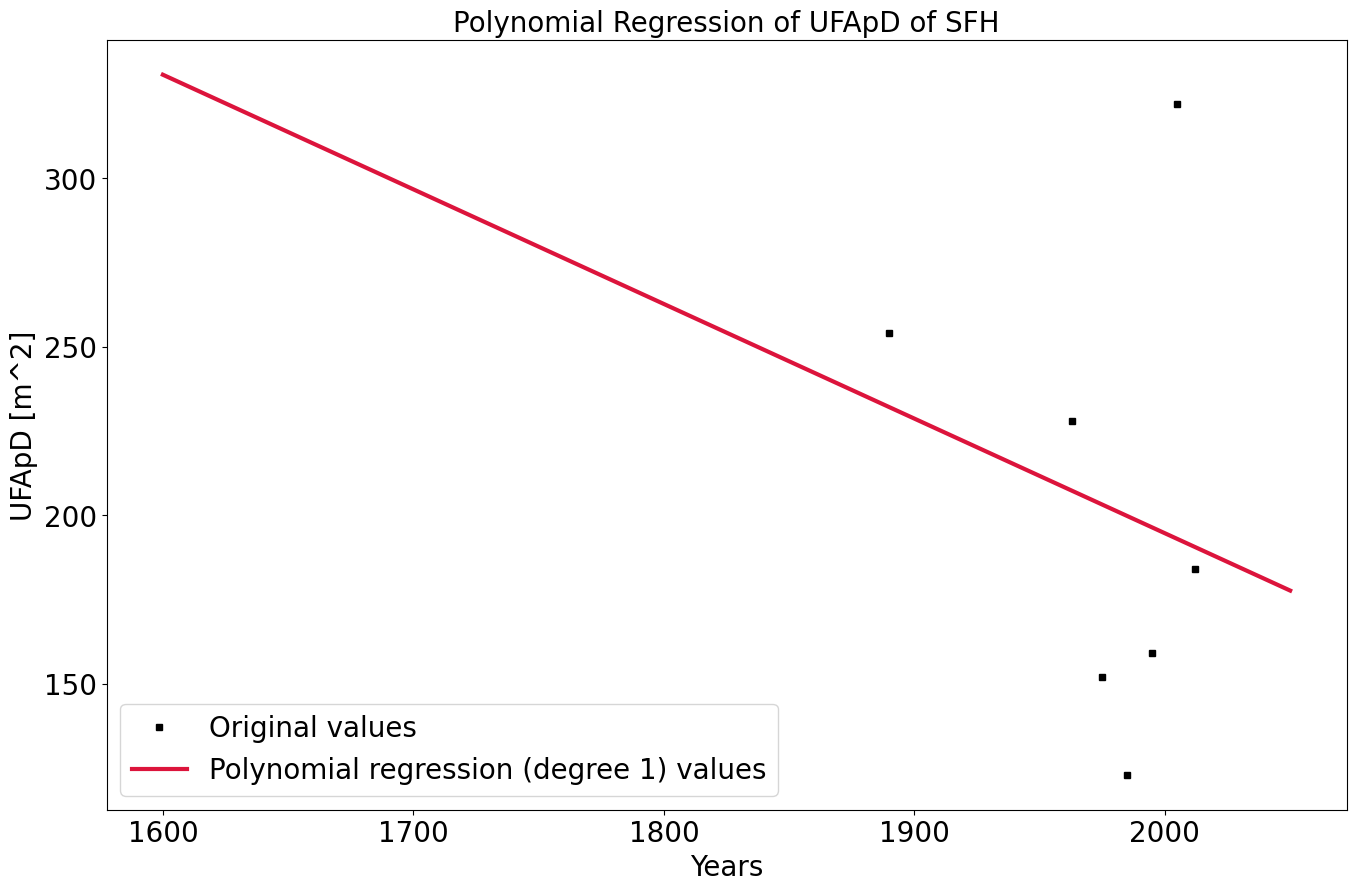

In [104]:
#* Linear Regression of UFApD of SFH
historical_UFApD_SFH
#the basic values:
oj_years_UFApD = historical_UFApD_SFH.index
oj_values_UFApD_SFH = historical_UFApD_SFH['UFApD']
#________________________________________________
#create the short data set for the regression
limit_pred = int(len(oj_years_UFApD)*1.5) #limit the prediction to 1.5* perc % of the data
reg_predictor_years = oj_years_UFApD[0:limit_pred]

#perform regression:
#find beta
linear_model1 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_SFH, 1))
linear_model2 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_SFH, 2))
linear_model3 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_SFH, 3))
#print(f' the linear model our fit created is {linear_model}.')
#apply to extended values
lin_reg_fitted_values1 = linear_model1(reg_predictor_years)
lin_reg_fitted_values2 = linear_model2(reg_predictor_years)
lin_reg_fitted_values3 = linear_model3(reg_predictor_years)
#________________________________________
inputs = oj_years_UFApD
outputs = oj_values_UFApD_SFH

early_years = np.array(np.arange(1600, 1890, 1, dtype=int))
prelim_append_1 = np.append(early_years, oj_years_UFApD)

missing_years_1 = np.array(np.arange(1890, 1963, 1, dtype=int))
prelim_append_2 = np.append(prelim_append_1, missing_years_1)

missing_years_2 = np.array(np.arange(1964, 1975, 1, dtype=int))
prelim_append_3 = np.append(prelim_append_2, missing_years_2)

missing_years_3 = np.array(np.arange(1976, 1985, 1, dtype=int))
prelim_append_4 = np.append(prelim_append_3, missing_years_3)

missing_years_4 = np.array(np.arange(1986, 1995, 1, dtype=int))
prelim_append_5 = np.append(prelim_append_4, missing_years_4)

missing_years_5 = np.array(np.arange(1996, 2005, 1, dtype=int))
prelim_append_6 = np.append(prelim_append_5, missing_years_5)

missing_years_6 = np.array(np.arange(2006, 2012, 1, dtype=int))
prelim_append_7 = np.append(prelim_append_6, missing_years_6)

pred_inputs_lin_UFApD = np.append(prelim_append_7, np.arange(2012, 2051, 1, dtype=int))
pred_inputs_lin_UFApD.sort()

#perform regression:
#set degreee:
degree1 = 1
degree2 = 2
degree3 = 3
#find polynomial
polynomial1 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_SFH, degree1))
polynomial2 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_SFH, degree2))
polynomial3 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_SFH, degree3))

#apply to extended values
pred_outputs_lin1_UFApD_SFH = polynomial1(pred_inputs_lin_UFApD)
pred_outputs_lin2_UFApD_SFH = polynomial2(pred_inputs_lin_UFApD)
pred_outputs_lin3_UFApD_SFH = polynomial3(pred_inputs_lin_UFApD)
#_________________________________________________________________
plt.figure(figsize=(16,10))
plt.plot(oj_years_UFApD, oj_values_UFApD_SFH, 's', color = 'black', markersize = 5, label = f'Original values')
plt.plot(pred_inputs_lin_UFApD, pred_outputs_lin1_UFApD_SFH, color = 'crimson', lw = 3, label = f'Polynomial regression (degree {degree1}) values')
#plt.plot(pred_inputs_lin_UFApD, pred_outputs_lin2_UFApD_SFH, color = 'blue', lw = 3, label = f'polynomial regression (degree {degree2}) values')
#plt.plot(pred_inputs_lin_UFApD, pred_outputs_lin3_UFApD_SFH, color = 'green', lw = 3, label = f'polynomial regression (degree {degree3}) values')
plt.legend(loc = 'best', fontsize=20)
plt.title('Polynomial Regression of UFApD of SFH', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.ylabel('UFApD [m^2]', fontsize=20)
plt.xticks(fontsize=20)  # Change the font size for x-axis numbers
plt.yticks(fontsize=20)  # Change the font size for y-axis numbers
plt.show()

c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\pandas\core\indexes\base.py:920: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\pandas\core\indexes\base.py:920: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


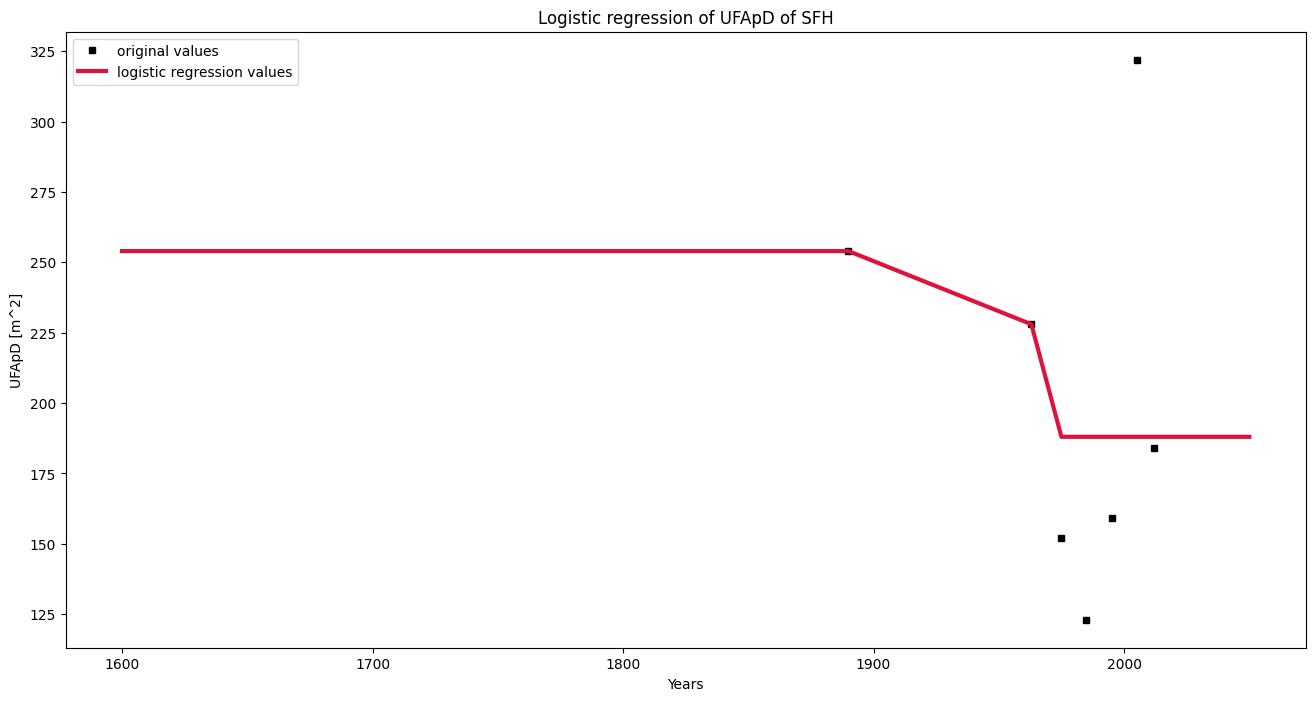

In [105]:
#* Logistic Regression of UFApD of SFH

oj_years_UFApD = historical_UFApD_SFH.index
oj_values_UFApD_SFH = historical_UFApD_SFH['UFApD']
#___________________________
inputs = oj_years_UFApD
outputs = oj_values_UFApD_SFH

early_years = np.array(np.arange(1600, 1890, 1, dtype=int))
prelim_append = np.append(early_years, oj_years_UFApD)
pred_inputs_l_UFApD = np.append(prelim_append, np.arange(2012, 2051, 1, dtype=int))
pred_inputs_l_UFApD.sort()

popt, pcov = curve_fit(logistic.logistic, inputs, outputs, bounds = ([min(inputs), 0, 0, 0], [max(inputs), 10**6, 10**5, 10**6]))
pred_outputs_l_UFApD = logistic.logistic(pred_inputs_l_UFApD, *popt)

fig=plt.figure(figsize = (16,8))
plt.plot(oj_years_UFApD, oj_values_UFApD_SFH, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_l_UFApD, pred_outputs_l_UFApD, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')
plt.xlabel('Years')
plt.ylabel('UFApD [m^2]')
plt.title('Logistic regression of UFApD of SFH')
plt.show()

The ncs_model


c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  

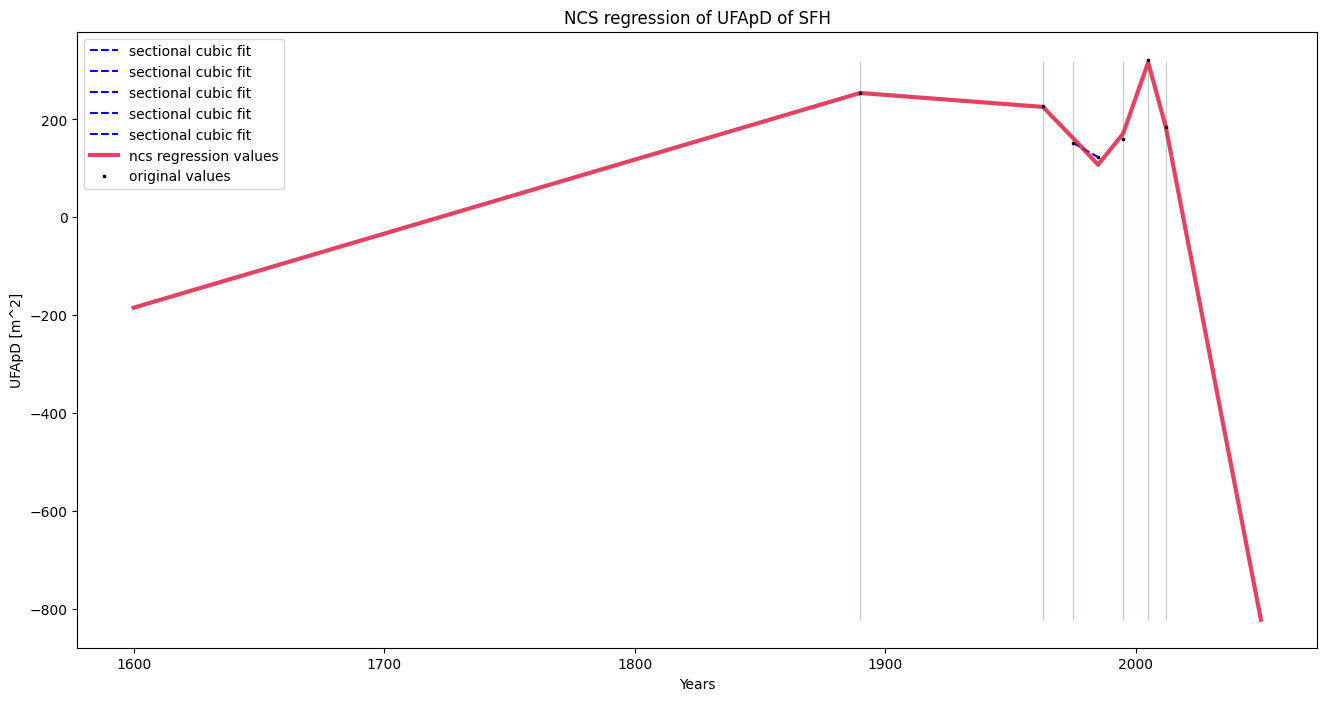

In [106]:
#* NCS Regression of UFApD_SFH

oj_years_UFApD = np.array(historical_UFApD_SFH.index)
oj_values_UFApD_SFH = np.array(historical_UFApD_SFH['UFApD'])

inputs_ncs = oj_years_UFApD
outputs_ncs = oj_values_UFApD_SFH

early_years = np.array(np.arange(1600, 1890, 1, dtype=int))
prelim_append = np.append(early_years, oj_years_UFApD)
pred_inputs_ncs_UFApD = np.append(prelim_append, np.arange(2012, 2051, 1, dtype=int))
pred_inputs_ncs_UFApD.sort()
#pred_inputs_ncs_UFApD = oj_years_UFApD

# we can either choose the knots manually, or supply a number of knots
# - see second graphic on top.
# knots at the 2nd and 2nd to last points, and at 20%, 40%, 60% and 80%
knots = [inputs_ncs[0], inputs_ncs[int(0.2*len(inputs_ncs))],inputs_ncs[int(0.4*len(inputs_ncs))],
        inputs_ncs[int(0.6*len(inputs_ncs))], inputs_ncs[int(0.8*len(inputs_ncs))], inputs_ncs[-1]]

# just for showing the different cubic fits
sections = []
for i, knot in enumerate(knots[1:]):
    index_first = np.where(inputs_ncs == knots[i])[0][0]
    index_second = np.where(inputs_ncs == knot)[0][0]
    section_years = inputs_ncs[index_first:index_second]
    section_values = outputs_ncs[index_first:index_second]
    sections.append([section_years, section_values])

# setting up the actual model (training)
ncs_model = ncs.get_natural_cubic_spline_model(inputs_ncs, outputs_ncs, minval=min(inputs_ncs), 
                                               maxval=max(inputs_ncs), knots = knots)
# predicting of the single curve by the model
pred_outputs_ncs_UFApD_SFH = ncs_model.predict(pred_inputs_ncs_UFApD)
print(f'The ncs_model')

fig=plt.figure(figsize = (16,8))
#plot the knots:
for knot in knots:
    plt.plot([knot, knot], [min(pred_outputs_ncs_UFApD_SFH), max(pred_outputs_ncs_UFApD_SFH)], lw = 0.5, color = 'darkgreen', 
             alpha = 0.4)

for section in sections:
    [x,y] = section
    polynomial = np.poly1d(np.polyfit(x, y, 3))
    pol_outputs = polynomial(x)
    plt.plot(x, pol_outputs, '--', color = 'blue', lw = 1.5, label = 'sectional cubic fit')

plt.plot(pred_inputs_ncs_UFApD, pred_outputs_ncs_UFApD_SFH, color = 'crimson', lw = 3, alpha = 0.8,
         label = 'ncs regression values')
plt.plot(oj_years_UFApD, oj_values_UFApD_SFH, 's', color = 'black', markersize = 2, 
         label = f'original values')
plt.legend(loc = 'best')
#ticks = np.rint(oj_years[:int(len(oj_years)*perc_ncs/100*1.5):int(len(reg_predictor_years)/10)])
#plt.xticks(ticks = ticks)
#plt.xticks(ticks = np.rint(pred_inputs_ncs_pop[:limit_pred:int(len(reg_predictor_years)/10)]))
plt.xlabel('Years')
plt.ylabel('UFApD [m^2]')
plt.title('NCS regression of UFApD of SFH')
plt.show()

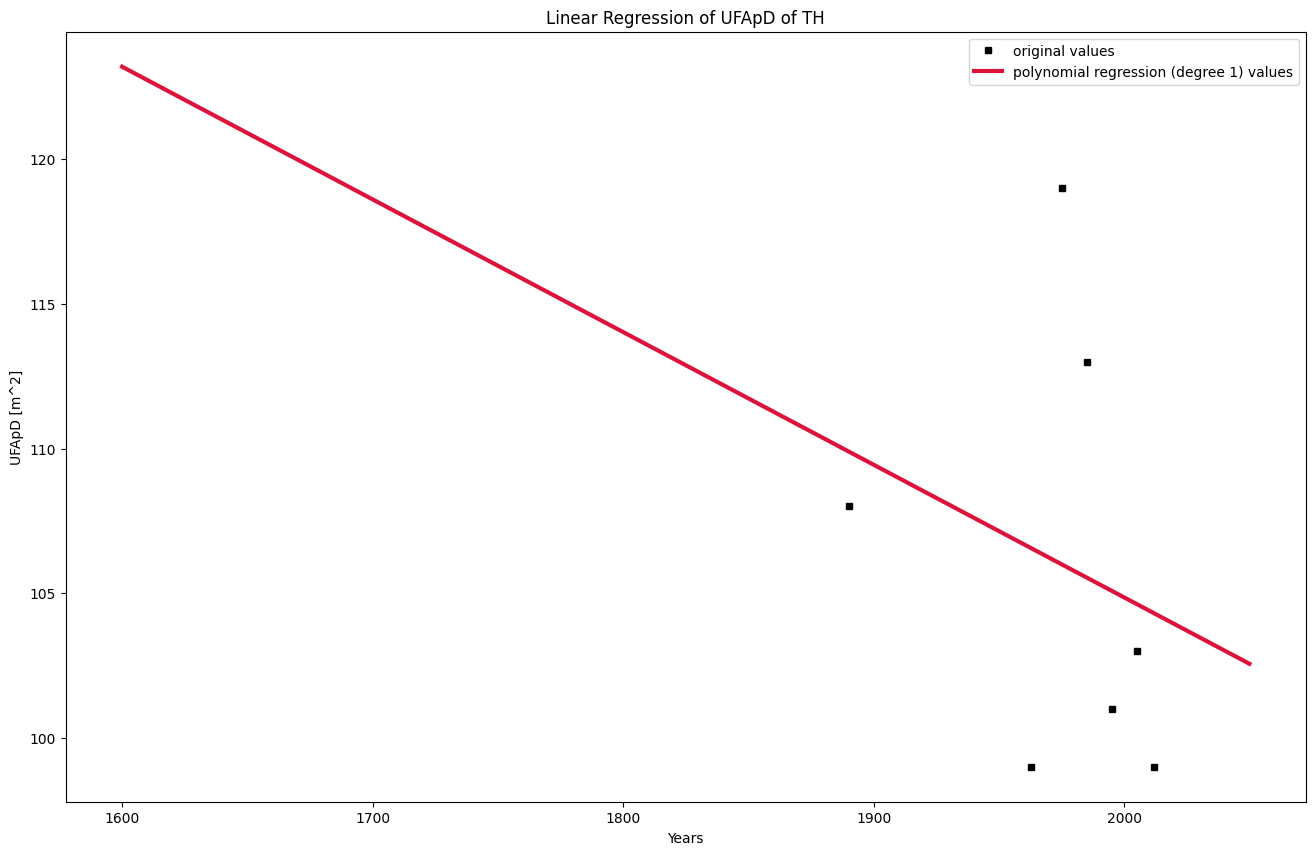

In [117]:
#* Linear Regression of UFApD of TH
historical_UFApD_TH
#the basic values:
oj_years_UFApD = historical_UFApD_TH.index
oj_values_UFApD_TH = historical_UFApD_TH['UFApD']

#________________________________________________
#create the short data set for the regression
limit_pred = int(len(oj_years_UFApD)*1.5) #limit the prediction to 1.5* perc % of the data
reg_predictor_years = oj_years_UFApD[0:limit_pred]

#perform regression:
#find beta
linear_model1 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_TH, 1))
linear_model2 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_TH, 2))
linear_model3 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_TH, 3))
#print(f' the linear model our fit created is {linear_model}.')
#apply to extended values
lin_reg_fitted_values1 = linear_model1(reg_predictor_years)
lin_reg_fitted_values2 = linear_model2(reg_predictor_years)
lin_reg_fitted_values3 = linear_model3(reg_predictor_years)
#________________________________________
inputs = oj_years_UFApD
outputs = oj_values_UFApD_TH

early_years = np.array(np.arange(1600, 1890, 1, dtype=int))
prelim_append_1 = np.append(early_years, oj_years_UFApD)

missing_years_1 = np.array(np.arange(1890, 1963, 1, dtype=int))
prelim_append_2 = np.append(prelim_append_1, missing_years_1)

missing_years_2 = np.array(np.arange(1964, 1975, 1, dtype=int))
prelim_append_3 = np.append(prelim_append_2, missing_years_2)

missing_years_3 = np.array(np.arange(1976, 1985, 1, dtype=int))
prelim_append_4 = np.append(prelim_append_3, missing_years_3)

missing_years_4 = np.array(np.arange(1986, 1995, 1, dtype=int))
prelim_append_5 = np.append(prelim_append_4, missing_years_4)

missing_years_5 = np.array(np.arange(1996, 2005, 1, dtype=int))
prelim_append_6 = np.append(prelim_append_5, missing_years_5)

missing_years_6 = np.array(np.arange(2006, 2012, 1, dtype=int))
prelim_append_7 = np.append(prelim_append_6, missing_years_6)

pred_inputs_lin_UFApD = np.append(prelim_append_7, np.arange(2012, 2051, 1, dtype=int))
pred_inputs_lin_UFApD.sort()

#perform regression:
#set degreee:
degree1 = 1
degree2 = 2
degree3 = 3
#find polynomial
polynomial1 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_TH, degree1))
polynomial2 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_TH, degree2))
polynomial3 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_TH, degree3))
#print(f' the polynomial our fit created is: \n{polynomial}.')
#apply to extended values
pred_outputs_lin1_UFApD_TH = polynomial1(pred_inputs_lin_UFApD)
pred_outputs_lin2_UFApD_TH = polynomial2(pred_inputs_lin_UFApD)
pred_outputs_lin3_UFApD_TH = polynomial3(pred_inputs_lin_UFApD)
#_________________________________________________________________
plt.figure(figsize=(16,10))
plt.plot(oj_years_UFApD, oj_values_UFApD_TH, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_lin_UFApD, pred_outputs_lin1_UFApD_TH, color = 'crimson', lw = 3, label = f'polynomial regression (degree {degree1}) values')
#plt.plot(pred_inputs_lin_UFApD, pred_outputs_lin2_UFApD_TH, color = 'blue', lw = 3, label = f'polynomial regression (degree {degree2}) values')
#plt.plot(pred_inputs_lin_UFApD, pred_outputs_lin3_UFApD_TH, color = 'green', lw = 3, label = f'polynomial regression (degree {degree3}) values')
plt.legend(loc = 'best')
#plt.xticks(ticks = np.rint(pred_inputs_p_pop[:limit_pred:int(len(reg_predictor_years)/10)]))
plt.title('Linear Regression of UFApD of TH')
plt.xlabel('Years')
plt.ylabel('UFApD [m^2]')
plt.show()

C:\Users\Solveig\Documents\GitHub\TEP4290_project\src/modules\logistic_curve_function.py:26: RuntimeWarning: overflow encountered in exp
  return (C1 - C0)/(1 + np.exp(-(x - ti) / tau)) + C0


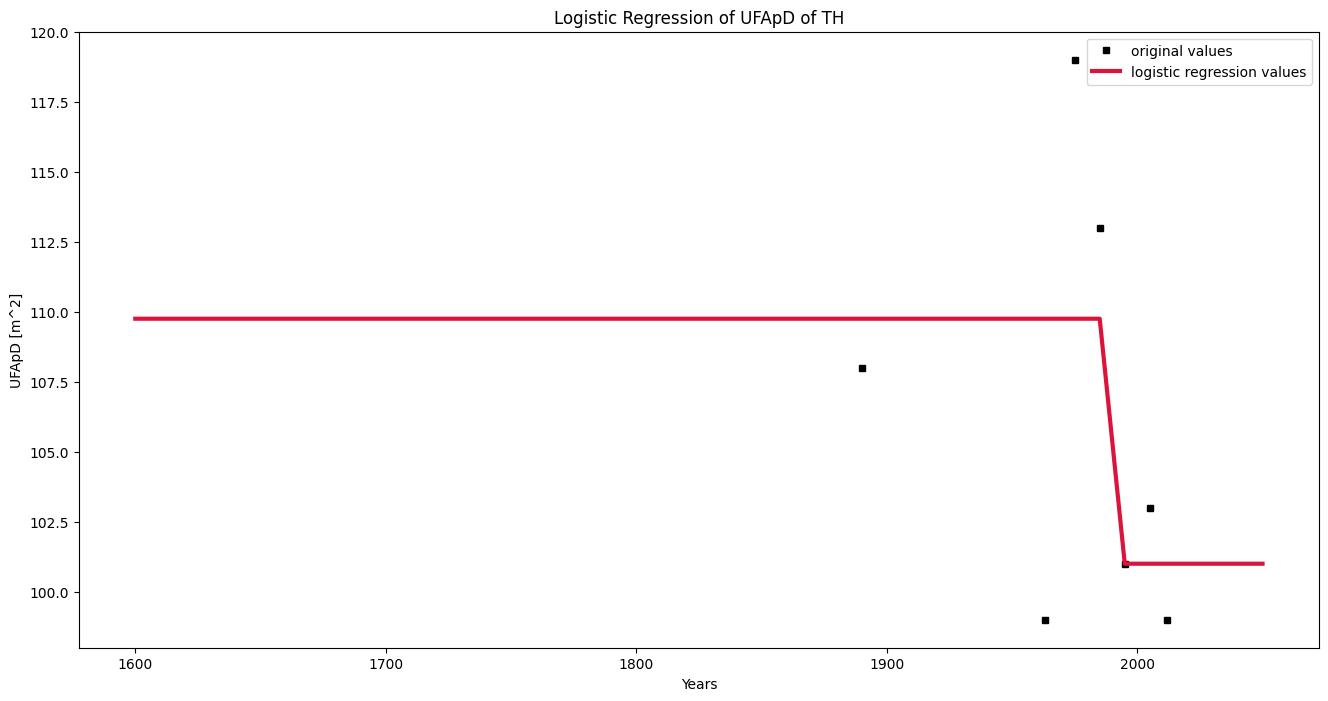

In [108]:
#* Logistic Regression of UFApD of TH

oj_years_UFApD = historical_UFApD_TH.index
oj_values_UFApD_SFH = historical_UFApD_TH['UFApD']
#___________________________
inputs = oj_years_UFApD
outputs = oj_values_UFApD_TH

early_years = np.array(np.arange(1600, 1890, 1, dtype=int))
prelim_append = np.append(early_years, oj_years_UFApD)
pred_inputs_l_UFApD = np.append(prelim_append, np.arange(2012, 2051, 1, dtype=int))
pred_inputs_l_UFApD.sort()

popt, pcov = curve_fit(logistic.logistic, inputs, outputs, bounds = ([min(inputs), 0, 0, 0], [max(inputs), 10**6, 10**5, 10**6]))
pred_outputs_l_UFApD_TH = logistic.logistic(pred_inputs_l_UFApD, *popt)

fig=plt.figure(figsize = (16,8))
plt.plot(oj_years_UFApD, oj_values_UFApD_TH, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_l_UFApD, pred_outputs_l_UFApD_TH, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')
#plt.xticks(ticks = np.rint(pred_inputs_l_PpD[:limit_pred:int(len(oj_values_PpD)/10)]))
plt.xlabel('Years')
plt.ylabel('UFApD [m^2]')
plt.title('Logistic Regression of UFApD of TH')
plt.show()

The ncs_model


c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  

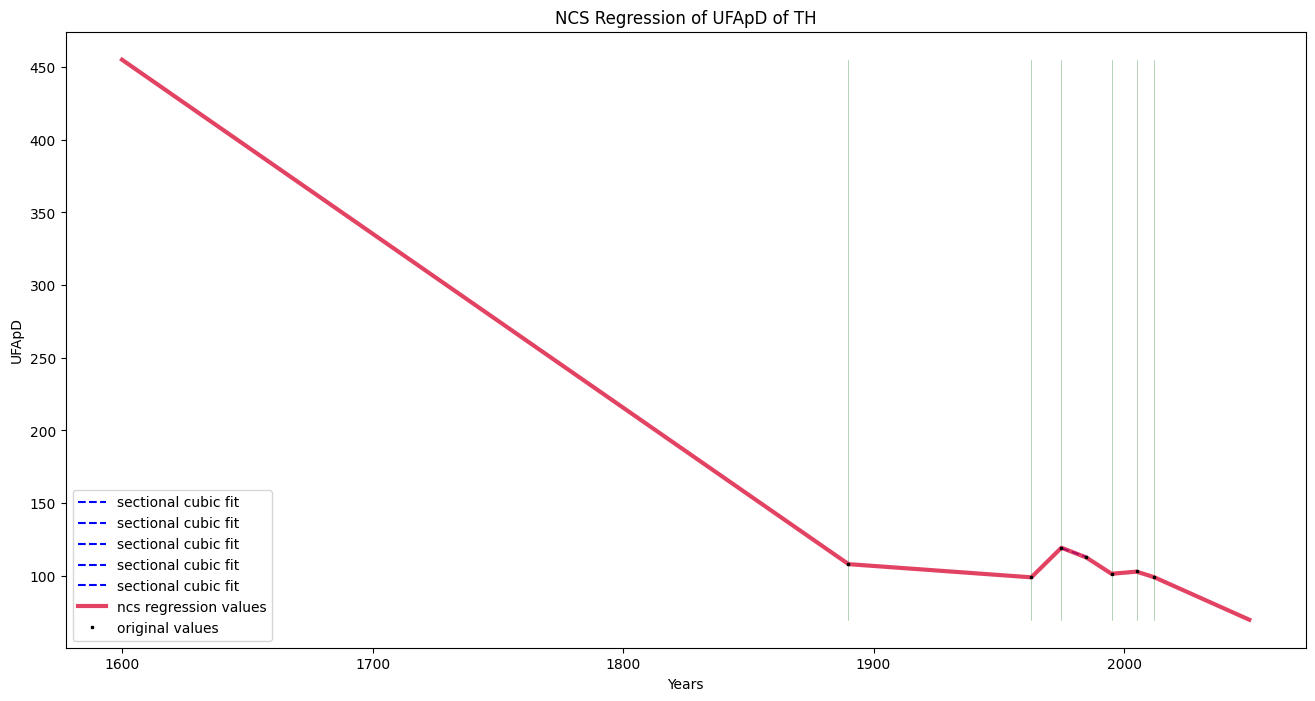

In [109]:
#* NCS Regression of UFApD_TH

oj_years_UFApD = np.array(historical_UFApD_TH.index)
oj_values_UFApD_TH = np.array(historical_UFApD_TH['UFApD'])

inputs_ncs = oj_years_UFApD
outputs_ncs = oj_values_UFApD_TH

early_years = np.array(np.arange(1600, 1890, 1, dtype=int))
prelim_append = np.append(early_years, oj_years_UFApD)
pred_inputs_ncs_UFApD = np.append(prelim_append, np.arange(2012, 2051, 1, dtype=int))
pred_inputs_ncs_UFApD.sort()

#pred_inputs_ncs_UFApD = oj_years_UFApD
#print(pred_inputs_ncs_UFApD)

# we can either choose the knots manually, or supply a number of knots
# - see second graphic on top.
# knots at the 2nd and 2nd to last points, and at 20%, 40%, 60% and 80%
knots = [inputs_ncs[0], inputs_ncs[int(0.2*len(inputs_ncs))],inputs_ncs[int(0.4*len(inputs_ncs))],
        inputs_ncs[int(0.6*len(inputs_ncs))], inputs_ncs[int(0.8*len(inputs_ncs))], inputs_ncs[-1]]

# just for showing the different cubic fits
sections = []
for i, knot in enumerate(knots[1:]):
    index_first = np.where(inputs_ncs == knots[i])[0][0]
    index_second = np.where(inputs_ncs == knot)[0][0]
    section_years = inputs_ncs[index_first:index_second]
    section_values = outputs_ncs[index_first:index_second]
    sections.append([section_years, section_values])

# setting up the actual model (training)
ncs_model = ncs.get_natural_cubic_spline_model(inputs_ncs, outputs_ncs, minval=min(inputs_ncs), 
                                               maxval=max(inputs_ncs), knots = knots)
# predicting of the single curve by the model
pred_outputs_ncs_UFApD_TH = ncs_model.predict(pred_inputs_ncs_UFApD)
print(f'The ncs_model')

fig=plt.figure(figsize = (16,8))
#plot the knots:
for knot in knots:
    plt.plot([knot, knot], [min(pred_outputs_ncs_UFApD_TH), max(pred_outputs_ncs_UFApD_TH)], lw = 0.5, color = 'darkgreen', 
             alpha = 0.4)

for section in sections:
    [x,y] = section
    polynomial = np.poly1d(np.polyfit(x, y, 3))
    pol_outputs = polynomial(x)
    plt.plot(x, pol_outputs, '--', color = 'blue', lw = 1.5, label = 'sectional cubic fit')

plt.plot(pred_inputs_ncs_UFApD, pred_outputs_ncs_UFApD_TH, color = 'crimson', lw = 3, alpha = 0.8,
         label = 'ncs regression values')
plt.plot(oj_years_UFApD, oj_values_UFApD_TH, 's', color = 'black', markersize = 2, 
         label = f'original values')
plt.legend(loc = 'best')
#ticks = np.rint(oj_years[:int(len(oj_years)*perc_ncs/100*1.5):int(len(reg_predictor_years)/10)])
#plt.xticks(ticks = ticks)
#plt.xticks(ticks = np.rint(pred_inputs_ncs_pop[:limit_pred:int(len(reg_predictor_years)/10)]))
plt.xlabel('Years')
plt.ylabel('UFApD')
plt.title('NCS Regression of UFApD of TH')
plt.show()

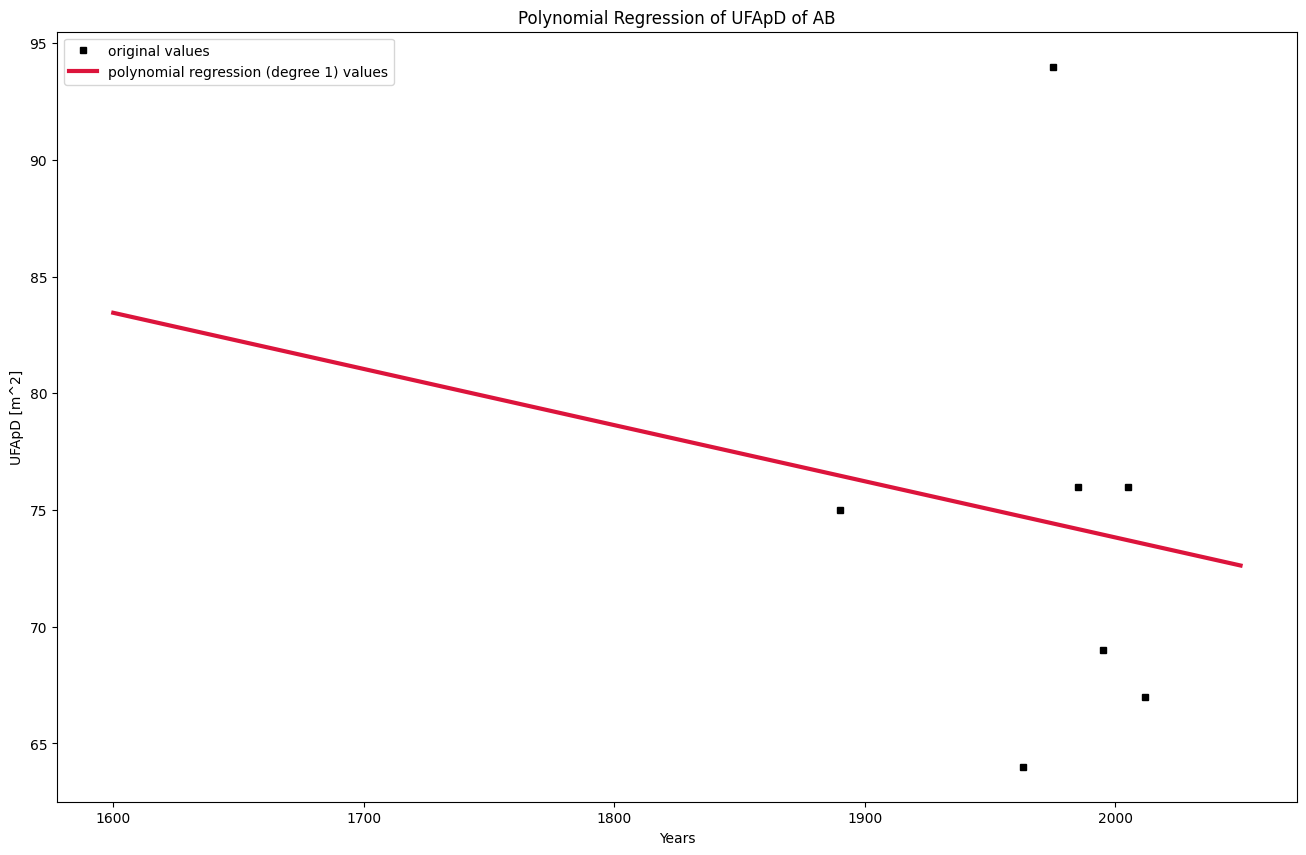

In [110]:
#* Linear Regression of UFApD of AB
historical_UFApD_AB
#the basic values:
oj_years_UFApD = historical_UFApD_AB.index
oj_values_UFApD_AB = historical_UFApD_AB['UFApD']

#________________________________________________
#create the short data set for the regression
limit_pred = int(len(oj_years_UFApD)*1.5) #limit the prediction to 1.5* perc % of the data
reg_predictor_years = oj_years_UFApD[0:limit_pred]

#perform regression:
#find beta
linear_model1 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_AB, 1))
linear_model2 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_AB, 2))
linear_model3 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_AB, 3))
#print(f' the linear model our fit created is {linear_model}.')
#apply to extended values
lin_reg_fitted_values1 = linear_model1(reg_predictor_years)
lin_reg_fitted_values2 = linear_model2(reg_predictor_years)
lin_reg_fitted_values3 = linear_model3(reg_predictor_years)
#________________________________________
inputs = oj_years_UFApD
outputs = oj_values_UFApD_AB

early_years = np.array(np.arange(1600, 1890, 1, dtype=int))
prelim_append_1 = np.append(early_years, oj_years_UFApD)

missing_years_1 = np.array(np.arange(1890, 1963, 1, dtype=int))
prelim_append_2 = np.append(prelim_append_1, missing_years_1)

missing_years_2 = np.array(np.arange(1964, 1975, 1, dtype=int))
prelim_append_3 = np.append(prelim_append_2, missing_years_2)

missing_years_3 = np.array(np.arange(1976, 1985, 1, dtype=int))
prelim_append_4 = np.append(prelim_append_3, missing_years_3)

missing_years_4 = np.array(np.arange(1986, 1995, 1, dtype=int))
prelim_append_5 = np.append(prelim_append_4, missing_years_4)

missing_years_5 = np.array(np.arange(1996, 2005, 1, dtype=int))
prelim_append_6 = np.append(prelim_append_5, missing_years_5)

missing_years_6 = np.array(np.arange(2006, 2012, 1, dtype=int))
prelim_append_7 = np.append(prelim_append_6, missing_years_6)

pred_inputs_lin_UFApD = np.append(prelim_append_7, np.arange(2012, 2051, 1, dtype=int))
pred_inputs_lin_UFApD.sort()

#perform regression:
#set degreee:
degree1 = 1
degree2 = 2
degree3 = 3
#find polynomial
polynomial1 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_AB, degree1))
polynomial2 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_AB, degree2))
polynomial3 = np.poly1d(np.polyfit(oj_years_UFApD, oj_values_UFApD_AB, degree3))
#print(f' the polynomial our fit created is: \n{polynomial}.')
#apply to extended values
pred_outputs_lin1_UFApD_AB = polynomial1(pred_inputs_lin_UFApD)
pred_outputs_lin2_UFApD_AB = polynomial2(pred_inputs_lin_UFApD)
pred_outputs_lin3_UFApD_AB = polynomial3(pred_inputs_lin_UFApD)
#_________________________________________________________________
plt.figure(figsize=(16,10))
plt.plot(oj_years_UFApD, oj_values_UFApD_AB, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_lin_UFApD, pred_outputs_lin1_UFApD_AB, color = 'crimson', lw = 3, label = f'polynomial regression (degree {degree1}) values')
#plt.plot(pred_inputs_lin_UFApD, pred_outputs_lin2_UFApD_AB, color = 'blue', lw = 3, label = f'polynomial regression (degree {degree2}) values')
#plt.plot(pred_inputs_lin_UFApD, pred_outputs_lin3_UFApD_AB, color = 'green', lw = 3, label = f'polynomial regression (degree {degree3}) values')
plt.legend(loc = 'best')
#plt.xticks(ticks = np.rint(pred_inputs_p_pop[:limit_pred:int(len(reg_predictor_years)/10)]))
plt.title('Polynomial Regression of UFApD of AB')
plt.xlabel('Years')
plt.ylabel('UFApD [m^2]')
plt.show()

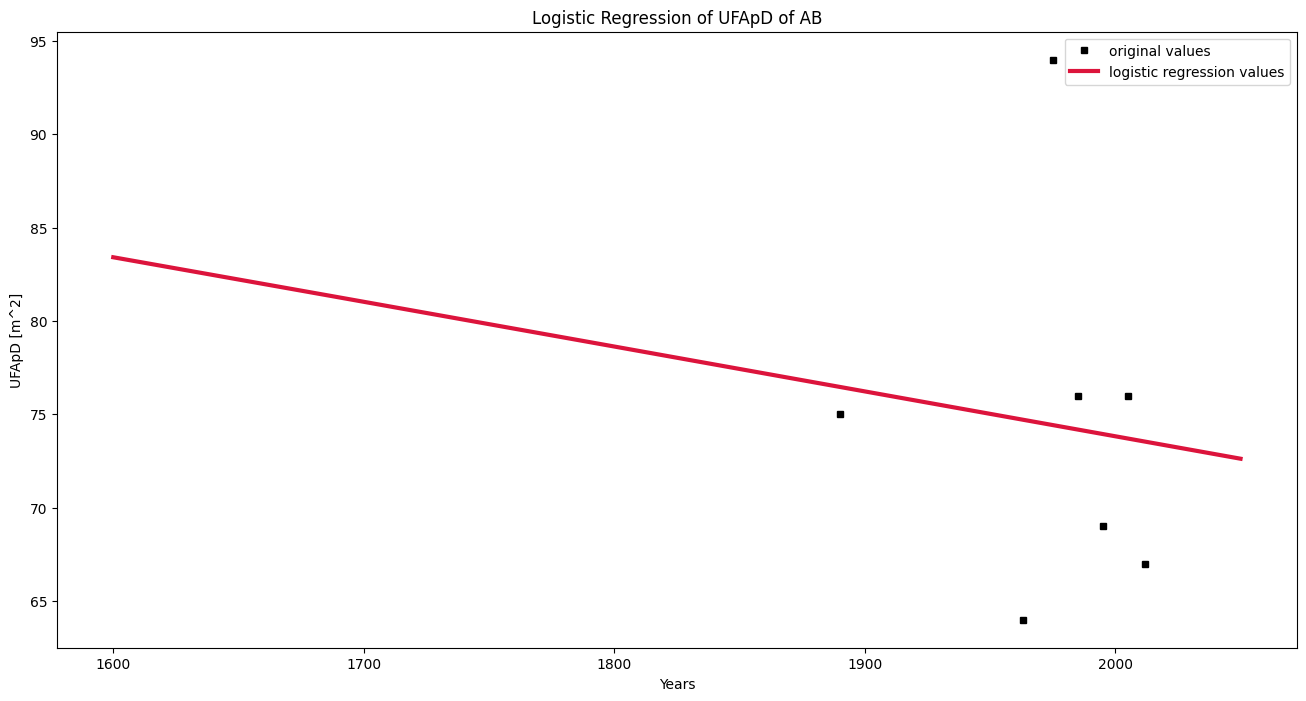

In [111]:
#* Logistic Regression of UFApD of AB

oj_years_UFApD = historical_UFApD_AB.index
oj_values_UFApD_AB = historical_UFApD_AB['UFApD']
#___________________________
inputs = oj_years_UFApD
outputs = oj_values_UFApD_AB

early_years = np.array(np.arange(1600, 1890, 1, dtype=int))
prelim_append = np.append(early_years, oj_years_UFApD)
pred_inputs_l_UFApD = np.append(prelim_append, np.arange(2012, 2051, 1, dtype=int))
pred_inputs_l_UFApD.sort()

popt, pcov = curve_fit(logistic.logistic, inputs, outputs, bounds = ([min(inputs), 0, 0, 0], [max(inputs), 10**6, 10**5, 10**6]))
pred_outputs_l_UFApD_AB = logistic.logistic(pred_inputs_l_UFApD, *popt)

fig=plt.figure(figsize = (16,8))
plt.plot(oj_years_UFApD, oj_values_UFApD_AB, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_l_UFApD, pred_outputs_l_UFApD_AB, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')
#plt.xticks(ticks = np.rint(pred_inputs_l_PpD[:limit_pred:int(len(oj_values_PpD)/10)]))
plt.xlabel('Years')
plt.ylabel('UFApD [m^2]')
plt.title('Logistic Regression of UFApD of AB')
plt.show()

The ncs_model


c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Solveig\miniconda3\miniconda_ny\envs\TEP4221\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  

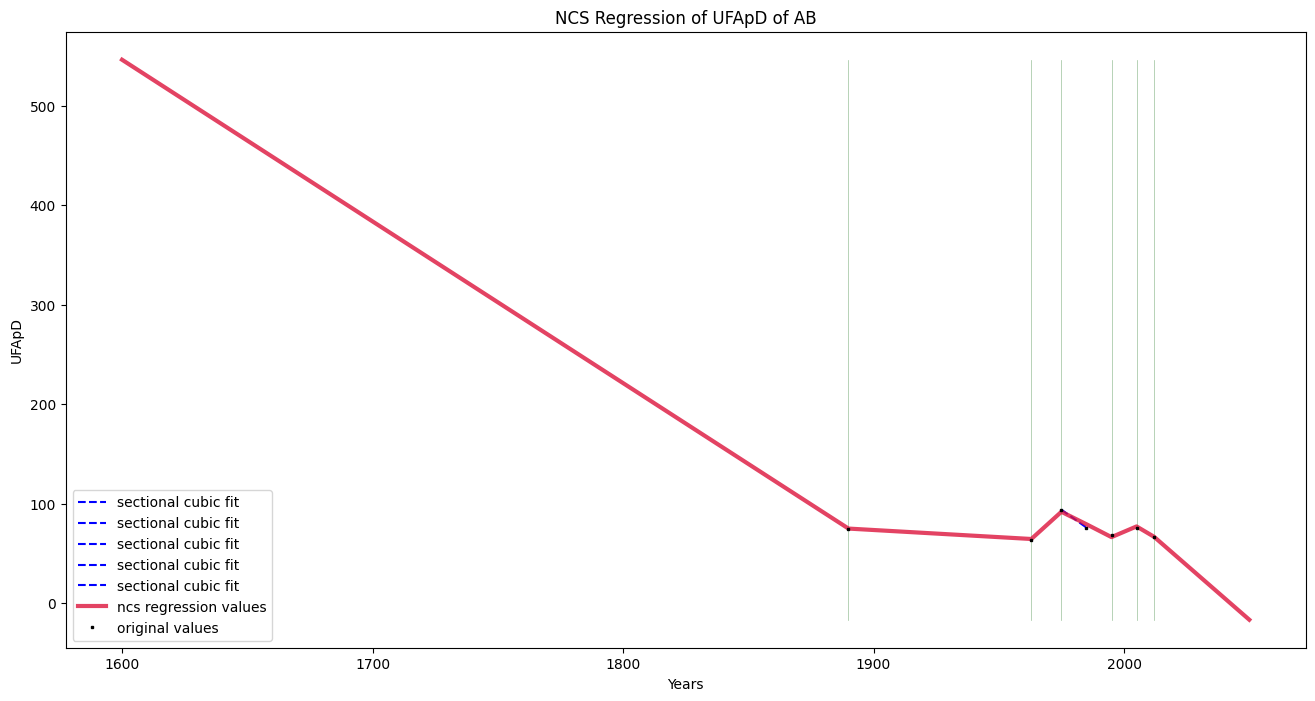

In [112]:
#* NCS Regression of UFApD_AB

oj_years_UFApD = np.array(historical_UFApD_AB.index)
oj_values_UFApD_AB = np.array(historical_UFApD_AB['UFApD'])

inputs_ncs = oj_years_UFApD
outputs_ncs = oj_values_UFApD_AB
#print(inputs_ncs)
#print(outputs_ncs)

early_years = np.array(np.arange(1600, 1890, 1, dtype=int))
prelim_append = np.append(early_years, oj_years_UFApD)
pred_inputs_ncs_UFApD = np.append(prelim_append, np.arange(2012, 2051, 1, dtype=int))
pred_inputs_ncs_UFApD.sort()

#pred_inputs_ncs_UFApD = oj_years_UFApD
#print(pred_inputs_ncs_UFApD)

# we can either choose the knots manually, or supply a number of knots
# - see second graphic on top.
# knots at the 2nd and 2nd to last points, and at 20%, 40%, 60% and 80%
knots = [inputs_ncs[0], inputs_ncs[int(0.2*len(inputs_ncs))],inputs_ncs[int(0.4*len(inputs_ncs))],
        inputs_ncs[int(0.6*len(inputs_ncs))], inputs_ncs[int(0.8*len(inputs_ncs))], inputs_ncs[-1]]

# just for showing the different cubic fits
sections = []
for i, knot in enumerate(knots[1:]):
    index_first = np.where(inputs_ncs == knots[i])[0][0]
    index_second = np.where(inputs_ncs == knot)[0][0]
    section_years = inputs_ncs[index_first:index_second]
    section_values = outputs_ncs[index_first:index_second]
    sections.append([section_years, section_values])

# setting up the actual model (training)
ncs_model = ncs.get_natural_cubic_spline_model(inputs_ncs, outputs_ncs, minval=min(inputs_ncs), 
                                               maxval=max(inputs_ncs), knots = knots)
# predicting of the single curve by the model
pred_outputs_ncs_UFApD_AB = ncs_model.predict(pred_inputs_ncs_UFApD)
print(f'The ncs_model')

fig=plt.figure(figsize = (16,8))
#plot the knots:
for knot in knots:
    plt.plot([knot, knot], [min(pred_outputs_ncs_UFApD_AB), max(pred_outputs_ncs_UFApD_AB)], lw = 0.5, color = 'darkgreen', 
             alpha = 0.4)

for section in sections:
    [x,y] = section
    polynomial = np.poly1d(np.polyfit(x, y, 3))
    pol_outputs = polynomial(x)
    plt.plot(x, pol_outputs, '--', color = 'blue', lw = 1.5, label = 'sectional cubic fit')

plt.plot(pred_inputs_ncs_UFApD, pred_outputs_ncs_UFApD_AB, color = 'crimson', lw = 3, alpha = 0.8,
         label = 'ncs regression values')
plt.plot(oj_years_UFApD, oj_values_UFApD_AB, 's', color = 'black', markersize = 2, 
         label = f'original values')
plt.legend(loc = 'best')
#ticks = np.rint(oj_years[:int(len(oj_years)*perc_ncs/100*1.5):int(len(reg_predictor_years)/10)])
#plt.xticks(ticks = ticks)
#plt.xticks(ticks = np.rint(pred_inputs_ncs_pop[:limit_pred:int(len(reg_predictor_years)/10)]))
plt.xlabel('Years')
plt.ylabel('UFApD')
plt.title('NCS Regression of UFApD of AB')
plt.show()

In [113]:
#RECOMBINE SFH, TH, and AB

regression_UFApD = pd.DataFrame(data=[pred_inputs_lin_UFApD, pred_outputs_lin1_UFApD_SFH, pred_outputs_lin1_UFApD_TH, pred_outputs_lin1_UFApD_AB]).T
regression_UFApD.rename(columns={0: 'Year', 1: 'UFApD SFH', 2: 'UFApD TH', 3: 'UFApD AB'}, inplace=True)
regression_UFApD.set_index('Year', inplace=True)

print(regression_UFApD)
#print(pred_inputs_lin_UFApD) # as index
#print(pred_outputs_lin1_UFApD_SFH) # as column for SFH
#print(pred_outputs_lin1_UFApD_TH) # as column for TH
#print(pred_outputs_lin1_UFApD_AB) # as column for AB

         UFApD SFH    UFApD TH   UFApD AB
Year                                     
1600.0  330.682806  123.200138  83.454020
1601.0  330.342699  123.154271  83.429952
1602.0  330.002593  123.108404  83.405885
1603.0  329.662486  123.062537  83.381817
1604.0  329.322380  123.016670  83.357749
...            ...         ...        ...
2046.0  178.995294  102.743441  72.719753
2047.0  178.655187  102.697573  72.695685
2048.0  178.315080  102.651706  72.671617
2049.0  177.974974  102.605839  72.647550
2050.0  177.634867  102.559972  72.623482

[453 rows x 3 columns]


Create dataframe for lifetime

# Export the regressed parameter data to excel

In [46]:
regression_lifetime.to_excel(directory_path / 
                 'Data/regression_data/Dwelling_Lifetime/lifetime_regression.xlsx')

In [47]:
regression_Pop = regression_Pop.drop_duplicates()
regression_Pop

,Pop
Year,
1600.0,3.978326e+05
1601.0,3.982964e+05
1602.0,3.987669e+05
1603.0,3.992442e+05
1604.0,3.997283e+05
...,...
2046.0,5.676510e+06
2047.0,5.697130e+06
2048.0,5.717614e+06


In [48]:
regression_Pop

,Pop
Year,
1600.0,3.978326e+05
1601.0,3.982964e+05
1602.0,3.987669e+05
1603.0,3.992442e+05
1604.0,3.997283e+05
...,...
2046.0,5.676510e+06
2047.0,5.697130e+06
2048.0,5.717614e+06


In [49]:
regression_Pop.to_excel(directory_path / 
                 'data/regression_data/Population/regression_Population.xlsx')

In [50]:
regression_PpD

,PpD
Year,
1600.0,5.406318
1601.0,5.406302
1602.0,5.406287
1603.0,5.406270
1604.0,5.406254
...,...
2046.0,1.915802
2047.0,1.909925
2048.0,1.904177


In [51]:
regression_PpD.to_excel(directory_path / 
                 'data/regression_data/PpD/regression_PpD.xlsx')

In [52]:
regression_UFApD.to_excel(directory_path / 
                 'data/regression_data/UFApD/regression_UFApD.xlsx')
